## GAS(1,1) model 

The general GAS(1,1) model for updating the parameter $f_t$ is
\begin{align}
    f_{t+1} = \omega + A s_{t} + B f_{t},
\end{align}
where $s_t = \mathcal{I}_{t}^{-1} \cdot \nabla_t$. Here $\mathcal{I}_{t}^{-1}$ is the inverse Fisher information and $\nabla_t = \frac{\partial}{\partial f_t} \log p(y_t | f_t)$.


Consider the model $y_t = \sigma_t \cdot \epsilon_t$, where the $\epsilon_t$ are IID standard Gaussian RV's and $\sigma_t$ is the time varying standard deviation. Let $f_t = \log \sigma_{t}^2$ so that $y_t \sim N(0, \exp(f_t))$ and
\begin{align}
\log p(y_t | f_t) &=  -\frac{1}{2} \log 2\pi - \frac{1}{2}f_t - \frac{1}{2}y_{t}^2 \exp(-f_t), \\
\nabla_t &= - \frac{1}{2} + \frac{1}{2}y_{t}^2 \exp(-f_t), \\
\mathcal{I}_{t} &= - \mathbb{E} \left[ \frac{\partial^2}{\partial f_{t}^2} \log p(y_t | f_t)  \right] =  \frac{1}{2}\exp(-f_t) \mathbb{E} \left[ y_{t}^2 \right] = \frac{1}{2}\exp(-f_t) \times \exp(f_t) = \frac{1}{2}.
\end{align}

Therefore the GAS(1,1) updating equation for this model is
\begin{align}
\log \sigma_{t+1}^2 = \omega + A \left( \frac{y_{t}^2}{\sigma_{t}^2} - 1 \right) + B \log \sigma_{t}^2.
\end{align}

In [1]:
from gas import GAS_Normal, plot_sims

In [2]:
g = GAS_Normal()
y, f = g.simulate(n = 1000, theta = (0.1, 0.3, 0.9))

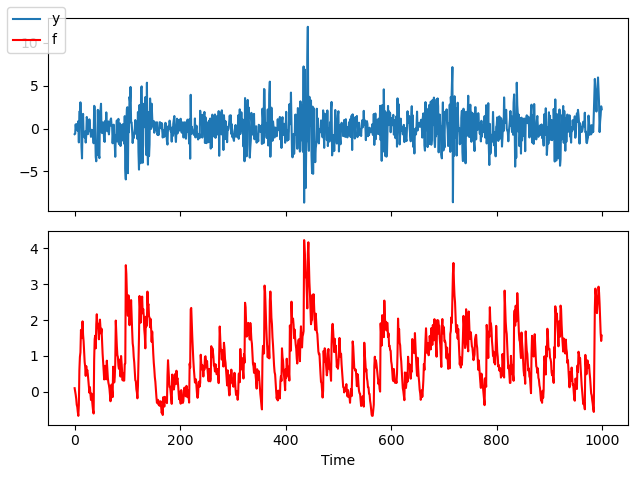

In [3]:
# plot data
plot_sims(y,f)

In [4]:
# fit with intial params guess in x0 (includes f_0 and s_0 at the end)
g.fit(y, x0 = [0.5, 0.5, 0.5, 0.5, 0.5])

Optimization terminated successfully.
         Current function value: 948.929200
         Iterations: 227
         Function evaluations: 379
omega = 0.11647006701223846, A = 0.2960908281400963, B = 0.8733022703743277
